#Day 10 - Multi-modal - 30daychartchallenge 2025

“Multi-modal” typically refers to charts that combine multiple modes of data or communication. That can include:

Different data modalities: e.g., combining text + images, numerical + categorical data, audio + visual, or even geographic + statistical.

Different visual elements or layers: e.g., a chart that overlays a bar chart on a map, or a timeline with embedded images or annotations.

In [2]:


import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv("/content/gdrive/My Drive/Spotify_2024_Global_Streaming_Data.csv")
# Quick preview
print(df.head())
print(df.info())

         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4          2023                          7.89                   3323.25   

   Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                         14240.35               

In [5]:


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Confirm column names
print(df.columns.tolist())

# Just rename for ease of use
df.rename(columns={
    'total_streams_millions': 'streams_millions',
    'monthly_listeners_millions': 'monthly_listeners_millions',
    'streams_last_30_days_millions': 'streams_last_30_days_millions',
    'avg_stream_duration_min': 'avg_stream_duration_min',
    'skip_rate_%': 'skip_rate_pct'
}, inplace=True)

# Preview cleaned data
print(df[['artist', 'genre', 'streams_millions', 'avg_stream_duration_min', 'skip_rate_pct']].head())



['country', 'artist', 'album', 'genre', 'release_year', 'monthly_listeners_millions', 'total_streams_millions', 'total_hours_streamed_millions', 'avg_stream_duration_min', 'platform_type', 'streams_last_30_days_millions', 'skip_rate_%']
         artist      genre  streams_millions  avg_stream_duration_min  \
0  Taylor Swift      K-pop           3695.53                     4.28   
1    The Weeknd        R&B           2828.16                     3.90   
2   Post Malone  Reggaeton           1425.46                     4.03   
3    Ed Sheeran      K-pop           2704.33                     3.26   
4    Ed Sheeran        R&B           3323.25                     4.47   

   skip_rate_pct  
0           2.24  
1          23.98  
2           4.77  
3          25.12  
4          15.82  


Facet title: Indie
Facet title: Rock
Facet title: EDM
Facet title: Classical


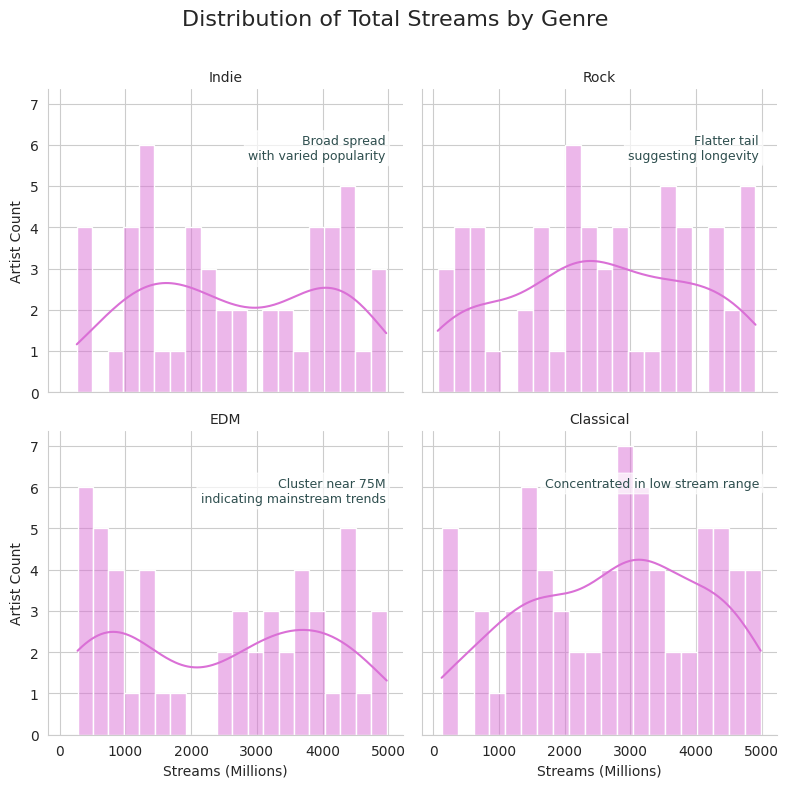

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to top 4 genres
top_genres = df['genre'].value_counts().nlargest(4).index
df_top_genres = df[df['genre'].isin(top_genres)]

# Set plot style
sns.set_style("whitegrid")

# Facet histogram by genre
g = sns.FacetGrid(df_top_genres, col='genre', col_wrap=2, height=4, sharex=True)
g.map(sns.histplot, 'streams_millions', bins=20, kde=True, color='orchid')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Streams (Millions)", "Artist Count")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Distribution of Total Streams by Genre", fontsize=16)

# Define annotations
annotations = {
    'Indie': 'Broad spread\nwith varied popularity',
    'Rock': 'Flatter tail\nsuggesting longevity',
    'EDM': 'Cluster near 75M\nindicating mainstream trends',
    'Classical': 'Concentrated in low stream range'
}


# Check titles and apply annotations
for ax in g.axes.flatten():
    full_title = ax.get_title()
    print(f"Facet title: {full_title}")  # Debug output to check title format
    genre = full_title.strip()  # Try exact match first

    if genre in annotations:
        ax.text(0.95, 0.85, annotations[genre],
                transform=ax.transAxes,
                ha='right', va='top',
                fontsize=9, color='darkslategray',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    else:
        print(f"No annotation for: {genre}")
